<a href="https://colab.research.google.com/github/mercy-stephen/rosalind/blob/main/GRP_1_Runmila_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this challenge you'll be taking the given dataset and working with predictive models to make certain inferences about it. This will be much more free form than the labs you've seen each week, but we decided to have this challenge on Google Colab, since its a familiar platform.

# Data

The dataset can be found [here](https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/). Note that you must have a 90/10 train/test split with this data!

The data is composed from a total of 27370 fish images taken from underwater live video. It contains 23 classes that represent different species of fish. 

![An image](https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/images/gt_labels.png)


The data is organised in 23 files, each containing a single class. The distribution of the images by class is as follows:

Number | Species | Count
--- | --- | ---
 01 | Dascyllus reticulatus  |	 12112  
 02 | Plectroglyphidodon dickii | 	 2683 
 03 | Chromis chrysura  |	 3593 
 04 | Amphiprion clarkii  |	 4049 
 05 | Chaetodon lunulatus  |	 2534 
 06 | Chaetodon trifascialis  |	 190 
 07 | Myripristis kuntee  |	 450 
 08 | Acanthurus nigrofuscus  |	 218 
 09 | Hemigymnus fasciatus  |	 241 	
 10 | Neoniphon sammara   |	 299 	
 11 | Abudefduf vaigiensis  |	 98 
 12 | Canthigaster valentini  |	 147 
 13 | Pomacentrus moluccensis  |	 181 
 14 | Zebrasoma scopas  |	 90 
 15 | Hemigymnus melapterus  |	 42 
 16 | Lutjanus fulvus  |	 206 
 17 | Scolopsis bilineata  |	 49 
 18 | Scaridae   |	 56 
 19 | Pempheris vanicolensis   |	 29 
 20 | Zanclus cornutus  |	 21 
 21 | Neoglyphidodon nigroris   |	 16 
 22 | Balistapus undulatus  | 	 41 
 23 | Siganus fuscescens   |	 25 	

Each image is named as "tracking id_fish id". The tracking id refers to the fish trajectory, so images sharing this id have the same fish. The fish id is unique for each image and ranges from 1 to 27370. 


# What is expected?

There are 3 primary tasks we'd like you to address with this data:

1. (4 pts) Data augmentation and cleaning. Take some time to sift through a bunch of the images, and see if there are useful changes you could make to them. Consider transformations you could use on images to increase the number of datapoints for particular categories.
2. (4 pts) Explore models to make inferences on the data. We are primarily looking for models that predict fish species given an image. You are welcome to work with models that do other things, but those should be done after making a classification model. Consider the different models you could use. If you decide to use a neural net, consider different options for the architecture, learning rate, activation functions, and other hyperparameters. These will likely have a large impact on your results!
3. (4 pts) Visualize what your model has learned in some way (hint: If you used a CNN, try plotting some of the learned convolutional filters). Can you make inferences about what the model learned or how? Take this time to also make some plots pertaining to accuracy. Feel free to dip into methods we didn't cover in the course, e.g. AUC, cross validation, etc.
4. (Bonus 4 pts) Produce a writeup of your results. While this step is optional, it is highly reccomended. In the field of Machine Learning and Data Science, it is incredibly important to be able to communicate your ideas and results to others. This is excellent practice for the real world, but it also is a way to demonstrate to potential employers your ability to communicate complex ideas! Here's what we'd hope for in a writeup: 

  a) A short description of the problem you tackled, why it may be important or useful, and the results. (1-2 paragraphs)

  b) A description of how and why you modified the data. (1-2 paragraphs)

  c) An explanation of the models you tried out that showed promise, as well as the final model you chose to use. Assume the reader has a basic understanding of how these models may work. If you use methods not covered in the course (e.g. attention, generative models, etc), then explain these methods in a few sentences so the reader knows the basic idea behind it. (2-3 paragraphs)

  d) Conclude by discussing the results you got. Who could use this information or model to solve a problem? (1 paragraph)



Note that the description for step 4 is just a set of reccomendations! You don't have to strictly adhere to the paragraph reccomendations, and you can cover more or less content in your write up. However you should treat the description as your baseline with which to work off of.


Lastly, we will award additional points based on the accuracy of your model. The additional points will be given as (% correct based on our testing)*4pts.


**Import all the required libraries**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import cv2
import matplotlib.pyplot as plt

from keras.models import Sequential
import tensorflow as tf
from keras.applications.xception import Xception, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.models import model_from_json

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from keras.models import Sequential 
from keras.layers import Dense, Flatten
from keras import optimizers

**Uploading and Extracting the Dataset**

In [ ]:
!wget https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/Archive/fishRecognition_GT.tar

--2021-10-09 02:56:02--  https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/Archive/fishRecognition_GT.tar
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510912000 (487M) [application/x-tar]
Saving to: ‘fishRecognition_GT.tar’

fishRecognition_GT. 100%[===================>] 487.24M  10.9MB/s    in 46s     

2021-10-09 02:56:50 (10.5 MB/s) - ‘fishRecognition_GT.tar’ saved [510912000/510912000]



In [ ]:
!tar --extract --verbose --file=fishRecognition_GT.tar

Streaming output truncated to the last 5000 lines.
mask_image/mask_04/mask_004604697458_25086.png
mask_image/mask_04/mask_004604757458_08968.png
mask_image/mask_04/mask_004604757458_08970.png
mask_image/mask_04/mask_004604757458_09078.png
mask_image/mask_04/mask_004604757458_10222.png
mask_image/mask_04/mask_004604757458_11090.png
mask_image/mask_04/mask_004604757458_15432.png
mask_image/mask_04/mask_004604837458_09077.png
mask_image/mask_04/mask_004604857458_17760.png
mask_image/mask_04/mask_004604887458_11726.png
mask_image/mask_04/mask_004604887458_17623.png
mask_image/mask_04/mask_004604887458_21280.png
mask_image/mask_04/mask_004604897458_23260.png
mask_image/mask_04/mask_004604957458_13532.png
mask_image/mask_04/mask_004604957458_15905.png
mask_image/mask_04/mask_004604977458_08967.png
mask_image/mask_04/mask_004604977458_09619.png
mask_image/mask_04/mask_004604977458_13357.png
mask_image/mask_04/mask_004604977458_16125.png
mask_image/mask_04/mask_004604997458_20199.png
mask_imag

In [ ]:
!wget https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/class_id.csv

--2021-10-09 02:57:43--  https://groups.inf.ed.ac.uk/f4k/GROUNDTRUTH/RECOG/class_id.csv
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 576325 (563K) [text/csv]
Saving to: ‘class_id.csv’

class_id.csv        100%[===================>] 562.82K   430KB/s    in 1.3s    

2021-10-09 02:57:46 (430 KB/s) - ‘class_id.csv’ saved [576325/576325]



**Load image files and labels**

In [ ]:
image_path = Path("/content/fish_image")



class_id =  pd.read_csv("/content/class_id.csv")

In [ ]:
label = []
path = []
for dirname, _,filenames in os.walk(image_path):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label
df.sort_values('label',ascending=True, inplace=True)
df.head()

,path,label
13684,/content/fish_image/fish_01/fish_004348757078_...,fish_01
12170,/content/fish_image/fish_01/fish_003459075316_...,fish_01
12171,/content/fish_image/fish_01/fish_000157259598_...,fish_01
12172,/content/fish_image/fish_01/fish_004133566771_...,fish_01
12173,/content/fish_image/fish_01/fish_000168219598_...,fish_01


In [ ]:
#convert labels to categorical
#df.label=df.label.astype('category').cat.codes
#df.describe()

In [ ]:
df.head()

,path,label
13684,/content/fish_image/fish_01/fish_004348757078_...,0
12170,/content/fish_image/fish_01/fish_003459075316_...,0
12171,/content/fish_image/fish_01/fish_000157259598_...,0
12172,/content/fish_image/fish_01/fish_004133566771_...,0
12173,/content/fish_image/fish_01/fish_000168219598_...,0


In [ ]:
species =  pd.read_csv("/content/drive/MyDrive/Runmila Challenge/Species_name.csv",header=None,delimiter=',')

n_species=species[0].tolist()
n_species

['fish_01',
 'fish_02',
 'fish_03',
 'fish_04',
 'fish_05',
 'fish_06',
 'fish_07',
 'fish_08',
 'fish_09',
 'fish_10',
 'fish_11',
 'fish_12',
 'fish_13',
 'fish_14',
 'fish_15',
 'fish_16',
 'fish_17',
 'fish_18',
 'fish_19',
 'fish_20',
 'fish_21',
 'fish_22',
 'fish_23']

**Data Augmentation**

In [ ]:
import matplotlib.pyplot as plt

import cv2
image_path = Path("/content/fish_image")
for category in n_species:
  path=os.path.join(image_path,category)
  for fish_img in os.listdir(path):
    fish=cv2.imread(os.path.join(path,fish_img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(fish, cmap='gray')
    plt.show()
    break 
  break


NameError: ignored

In [ ]:
fish.shape

NameError: ignored

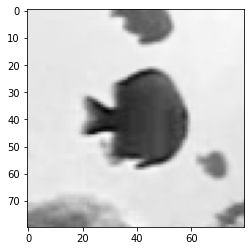

In [ ]:

new_fish_dim=cv2.resize(fish,(80,80))
plt.imshow(new_fish_dim,cmap='gray')
plt.show()

In [ ]:
species =  pd.read_csv("/content/drive/MyDrive/Runmila Challenge/Species_name.csv",header=None,delimiter=',')
species.head()

FileNotFoundError: ignored

In [ ]:
df.shape

(27370, 2)

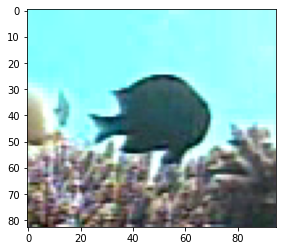

In [ ]:
import matplotlib.pyplot as plt

import cv2
image = plt.imread(df.path[10000])
plt.imshow(image)

In [ ]:
df.head()

,path,label
13684,/content/fish_image/fish_01/fish_004348757078_...,fish_01
12170,/content/fish_image/fish_01/fish_003459075316_...,fish_01
12171,/content/fish_image/fish_01/fish_000157259598_...,fish_01
12172,/content/fish_image/fish_01/fish_004133566771_...,fish_01
12173,/content/fish_image/fish_01/fish_000168219598_...,fish_01


In [ ]:
df_groups = df.groupby(['label'])
df_groups.size()

label
fish_01    12112
fish_02     2683
fish_03     3593
fish_04     4049
fish_05     2534
fish_06      190
fish_07      450
fish_08      218
fish_09      241
fish_10      299
fish_11       98
fish_12      147
fish_13      181
fish_14       90
fish_15       42
fish_16      206
fish_17       49
fish_18       56
fish_19       29
fish_20       21
fish_21       16
fish_22       41
fish_23       25
dtype: int64

In [ ]:
def balance_data(df,target_size=12113):
    """
    Increase the number of samples to number_of_samples for every label

        Example:
        Current size of the label a: 10
        Target size: 23

        repeat, mod = divmod(target_size,current_size) 
        2, 3 = divmod(23,10)

        Target size: current size * repeat + mod 

    Repeat this example for every label in the dataset.
    """

    df_groups = df.groupby(['label'])
    df_balanced = pd.DataFrame({key:[] for key in df.keys()})

    for i in df_groups.groups.keys():
        df_group = df_groups.get_group(i)
        df_label = df_group.sample(frac=1)
        current_size = len(df_label)

        if current_size >= target_size:
            # If current size is big enough, do nothing
            pass
        else:

            # Repeat the current dataset if it is smaller than target_size 
            repeat, mod = divmod(target_size,current_size)
            

            df_label_new = pd.concat([df_label]*repeat,ignore_index=True,axis=0)
            df_label_remainder = df_group.sample(n=mod)

            df_label_new = pd.concat([df_label_new,df_label_remainder],ignore_index=True,axis=0)

            print(df_label_new)

        df_balanced = pd.concat([df_balanced,df_label_new],ignore_index=True,axis=0)


    return df_balanced

df_balanced = balance_data(df)
print(df_balanced)


                                                    path    label
0      /content/fish_image/fish_01/fish_004480077258_...  fish_01
1      /content/fish_image/fish_01/fish_004594677451_...  fish_01
2      /content/fish_image/fish_01/fish_000036659598_...  fish_01
3      /content/fish_image/fish_01/fish_003747535940_...  fish_01
4      /content/fish_image/fish_01/fish_003434575293_...  fish_01
...                                                  ...      ...
12108  /content/fish_image/fish_01/fish_003819526127_...  fish_01
12109  /content/fish_image/fish_01/fish_000007470001_...  fish_01
12110  /content/fish_image/fish_01/fish_003943396429_...  fish_01
12111  /content/fish_image/fish_01/fish_000004700001_...  fish_01
12112  /content/fish_image/fish_01/fish_004126676756_...  fish_01

[12113 rows x 2 columns]
                                                    path    label
0      /content/fish_image/fish_02/fish_004195766859_...  fish_02
1      /content/fish_image/fish_02/fish_0000255495

In [ ]:
print(df_balanced)

                                                     path  label
0       /content/fish_image/fish_01/fish_003490065366_...    0.0
1       /content/fish_image/fish_01/fish_003571965521_...    0.0
2       /content/fish_image/fish_01/fish_003387555222_...    0.0
3       /content/fish_image/fish_01/fish_004244646944_...    0.0
4       /content/fish_image/fish_01/fish_003425465286_...    0.0
...                                                   ...    ...
278594  /content/fish_image/fish_23/fish_000007160001_...   22.0
278595  /content/fish_image/fish_23/fish_000704000123_...   22.0
278596  /content/fish_image/fish_23/fish_000007060001_...   22.0
278597  /content/fish_image/fish_23/fish_000007160001_...   22.0
278598  /content/fish_image/fish_23/fish_000704000123_...   22.0

[278599 rows x 2 columns]


In [ ]:
df_groupy = df_balanced.groupby(['label'])
df_groupy.size()

(248, 183, 3)


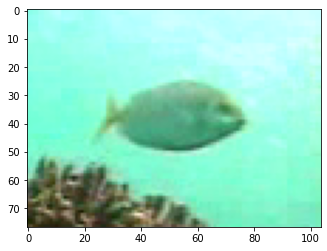

In [ ]:

image1 = plt.imread(df_balanced.path[273183])
print(image.shape)
plt.imshow(image1)

(248, 183, 3)


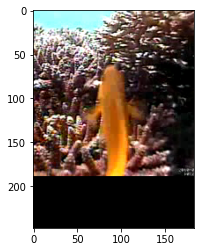

In [ ]:
image = plt.imread(df.path[27319])
print(image.shape)
plt.imshow(image)

In [ ]:
copy_df_balanced = df_balanced.copy()

In [ ]:
copy_df_balanced

,path,label
0,/content/fish_image/fish_01/fish_003751665959_...,0.0
1,/content/fish_image/fish_01/fish_004095456724_...,0.0
2,/content/fish_image/fish_01/fish_004461087244_...,0.0
3,/content/fish_image/fish_01/fish_000113559598_...,0.0
4,/content/fish_image/fish_01/fish_000099219598_...,0.0
...,...,...
278594,/content/fish_image/fish_23/fish_000007160001_...,22.0
278595,/content/fish_image/fish_23/fish_000007390001_...,22.0
278596,/content/fish_image/fish_23/fish_000007060001_...,22.0
278597,/content/fish_image/fish_23/fish_000007280001_...,22.0


In [ ]:
# Example of processed images that can be used for the model
image_datagen = ImageDataGenerator(
    rotation_range=180,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip=True,
    fill_mode = 'reflect')

image_generator = image_datagen.flow_from_dataframe(
            dataframe=copy_df_balanced,
            x_col='path',
            y_col='label',
            class_mode="categorical",
            batch_size=23,
           
            shuffle=False,
            crop_to_aspect_ratio=False,
            save_t0_dir= '/content/balanced data',
            save_format='png'
          
            )

batch=next(image_generator)
print (batch[0].shape)
img=batch[0][3]
print(image.shape)
plt.imshow(img)

TypeError: ignored

In [ ]:
# Another Example of processed images that can be used for the model 
# The technique with the best images will be used to process our dataset for model
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

image_generator = image_datagen.flow_from_dataframe(
            dataframe=copy_df_balanced,
            x_col='path',
            y_col='label',
            class_mode="categorical",
            batch_size=23,
           
            shuffle=False,
            crop_to_aspect_ratio=False,
            save_t0_dir= '/content/balanced data',
            save_format='png'
            )

batch=next(image_generator)
print (batch[0].shape)
img=batch[0][10]
print(image.shape)
plt.imshow(img)

TypeError: ignored

In [ ]:
train_df, test_df = train_test_split(df_balanced, train_size=0.9, shuffle=True, random_state=1)

In [ ]:
train_df.head()

,path,label
5549,/content/fish_image/fish_01/fish_004461707244_...,fish_01
417,/content/fish_image/fish_08/fish_000027190001_...,fish_08
3212,/content/fish_image/fish_02/fish_000012689596_...,fish_02
13213,/content/fish_image/fish_01/fish_003805156105_...,fish_01
14174,/content/fish_image/fish_01/fish_004127386756_...,fish_01


In [ ]:
train_group=train_df.groupby(['label'])
train_group.size()

label
fish_01    10898
fish_02    10868
fish_03    10905
fish_04    10920
fish_05    10923
fish_06    10825
fish_07    10877
fish_08    10913
fish_09    10840
fish_10    10887
fish_11    10920
fish_12    10990
fish_13    10879
fish_14    10916
fish_15    10872
fish_16    10872
fish_17    10915
fish_18    10886
fish_19    10976
fish_20    10951
fish_21    10926
fish_22    10906
fish_23    10874
dtype: int64

In [ ]:
test_group=test_df.groupby(['label'])
test_group.size()

label
fish_01    1184
fish_02     273
fish_03     356
fish_04     415
fish_05     260
fish_06      19
fish_07      43
fish_08      19
fish_09      31
fish_10      33
fish_11      10
fish_12      16
fish_13      18
fish_14       5
fish_15       7
fish_16      18
fish_17       5
fish_18       6
fish_19       3
fish_20       1
fish_22       9
fish_23       6
dtype: int64

In [ ]:
def balance_data(df,target_size=10929):
    """
    Increase the number of samples to number_of_samples for every label

        Example:
        Current size of the label a: 10
        Target size: 23

        repeat, mod = divmod(target_size,current_size) 
        2, 3 = divmod(23,10)

        Target size: current size * repeat + mod 

    Repeat this example for every label in the dataset.
    """

    df_groups = train_df.groupby(['label'])
    train_df_balanced = pd.DataFrame({key:[] for key in df.keys()})

    for i in df_groups.groups.keys():
        df_group = df_groups.get_group(i)
        df_label = df_group.sample(frac=1)
        current_size = len(df_label)

        if current_size >= target_size:
            # If current size is big enough, do nothing
            pass
        else:

            # Repeat the current dataset if it is smaller than target_size 
            repeat, mod = divmod(target_size,current_size)
            

            df_label_new = pd.concat([df_label]*repeat,ignore_index=True,axis=0)
            df_label_remainder = df_group.sample(n=mod)

            df_label_new = pd.concat([df_label_new,df_label_remainder],ignore_index=True,axis=0)

            print(df_label_new)

        train_df_balanced = pd.concat([train_df_balanced,df_label_new],ignore_index=True,axis=0)


    return train_df_balanced

train_df_balanced = balance_data(df)
print(train_df_balanced)


NameError: ignored

In [ ]:
#An example of how the preprocessing technique will be used
train_generator = ImageDataGenerator(
    rotation_range=180,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip=True,
    fill_mode = 'reflect',
    validation_split = 0.2)

test_generator = ImageDataGenerator(
    rotation_range=180,
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2, 
    horizontal_flip=True,
    fill_mode = 'reflect')

In [ ]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input,
    validation_split=0.2
)
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.xception.preprocess_input
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    
    shuffle=False
)

Found 200592 validated image filenames belonging to 23 classes.
Found 50147 validated image filenames belonging to 23 classes.
Found 27860 validated image filenames belonging to 23 classes.


In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    
    shuffle=False
)

TypeError: ignored

**Transfer Learning by loading Xception pretrained on imagenet dataset:I loaded the data from keras**

**Xception is the topmost pretrained model on imagenet dataset**

In [ ]:
tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling="avg",
    classes=100,
    classifier_activation="softmax",
)


**Building the model**

In [ ]:
pretrained_model= tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)
pretrained_model.trainable=False


In [ ]:
from tensorflow import keras


inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = pretrained_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with categorical classification
outputs = keras.layers.Dense(23, activation= 'softmax')(x)
model = keras.Model(inputs, outputs)
model.compile(loss =keras.losses.CategoricalCrossentropy() , metrics = ['acc'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 23)                47127     
Total params: 20,908,607
Trainable params: 47,127
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
#epochs =10
#batch_size=10000 
model.fit(train_images, validation_data=val_images, steps_per_epoch=100, validation_steps=50, epochs=10,verbose=1)
#model_train = model.fit(train_images, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=val_images)

Epoch 1/10
100/100 [==============================] - 51s 487ms/step - loss: 1.3461 - acc: 0.7256 - val_loss: 0.6567 - val_acc: 0.8675
Epoch 2/10
100/100 [==============================] - 48s 479ms/step - loss: 0.4902 - acc: 0.9022 - val_loss: 0.3497 - val_acc: 0.9325
Epoch 3/10
100/100 [==============================] - 48s 479ms/step - loss: 0.3025 - acc: 0.9391 - val_loss: 0.2761 - val_acc: 0.9337
Epoch 4/10
100/100 [==============================] - 48s 478ms/step - loss: 0.2370 - acc: 0.9438 - val_loss: 0.1991 - val_acc: 0.9563
Epoch 5/10
100/100 [==============================] - 48s 479ms/step - loss: 0.1824 - acc: 0.9569 - val_loss: 0.1787 - val_acc: 0.9594
Epoch 6/10
100/100 [==============================] - 48s 478ms/step - loss: 0.1413 - acc: 0.9697 - val_loss: 0.1374 - val_acc: 0.9681
Epoch 7/10
100/100 [==============================] - 53s 527ms/step - loss: 0.1311 - acc: 0.9681 - val_loss: 0.1149 - val_acc: 0.9706
Epoch 8/10
100/100 [==============================] - 5

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a of list results on training and test data
# sets for each training epoch
modelT=model.fit(train_images, validation_data=val_images, steps_per_epoch=100, validation_steps=50, epochs=10,verbose=1)


Epoch 1/10
100/100 [==============================] - 53s 528ms/step - loss: 0.0884 - acc: 0.9784 - val_loss: 0.0959 - val_acc: 0.9775
Epoch 2/10
100/100 [==============================] - 48s 480ms/step - loss: 0.0861 - acc: 0.9756 - val_loss: 0.0704 - val_acc: 0.9837
Epoch 3/10
100/100 [==============================] - 53s 527ms/step - loss: 0.0643 - acc: 0.9847 - val_loss: 0.0805 - val_acc: 0.9762
Epoch 4/10
100/100 [==============================] - 48s 479ms/step - loss: 0.0730 - acc: 0.9778 - val_loss: 0.0707 - val_acc: 0.9794
Epoch 5/10
100/100 [==============================] - 48s 480ms/step - loss: 0.0662 - acc: 0.9800 - val_loss: 0.0830 - val_acc: 0.9781
Epoch 6/10
100/100 [==============================] - 48s 479ms/step - loss: 0.0748 - acc: 0.9787 - val_loss: 0.0615 - val_acc: 0.9825
Epoch 7/10
100/100 [==============================] - 48s 480ms/step - loss: 0.0613 - acc: 0.9806 - val_loss: 0.0623 - val_acc: 0.9806
Epoch 8/10
100/100 [==============================] - 4

AttributeError: ignored

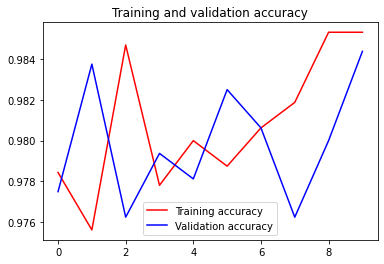

<Figure size 432x288 with 0 Axes>

In [44]:
acc = modelT.history['acc']
val_acc = modelT.history['val_acc']
loss = modelT.history['loss']
val_loss = modelT.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()